# [**Proyecto Final**](https://)

Desarrollar un módulo de
registro/modificación/eliminación de imágenes y sus metadatos usando Pandas,
Numpy,

In [30]:
# Importar dependencias

# La librería JSON permite abrir y guardar archivos en formato JSON
import json
# Sklearn cuenta con una herramienta para dividir un dataset
# en un subconjunto de entrenamiento y un subconjunto de evaluación
# Ambos, son importantes para el trabajo con aprendizaje automatico
from sklearn.model_selection import train_test_split
# os es una librería propia de Python que permite precesar archivos
import os
# La librería TQDM permite integrar barras de progreso en estructuras repetitivas for
from tqdm.auto import tqdm
# La librería shutil tiene implementaciones optimizadas para trabajar con archivos
import shutil
# La librería random permite crear números aleatorios
import random
# La librería OpenCV contiene funciones y algoritmos para procesar imágenes y video
import cv2
import pandas as pd
from matplotlib import pyplot as plt

# Definir las credentiales para acceder a Kaggle. Primero requerimos confirmar que
# el archivo aún no ha sido creado
KAGGLE_PATH = "/root/.kaggle"
if os.path.exists(KAGGLE_PATH):
  !rm -r "$KAGGLE_PATH"

!mkdir "$KAGGLE_PATH"
!touch "$KAGGLE_PATH/kaggle.json"

# Puedes crear tu propio token y username de la API de Kaggle en https://www.kaggle.com/
api_token = {"username":"robertorivero","key":"4f8063fcee4c5dc9703295dac06b4426"}

# Crear un archivo con las credenciales, de tal forma que kaggle pueda leerlas facilmente
with open(KAGGLE_PATH+'/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Cambiar los permisos de acceso del nuevo archivo con credenciales
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
%cd /content

# Comprobar si el conjunto de datos ya se ha descargado
if not os.path.exists('./covid'):
  # Crear una nueva carpeta
  os.makedirs('covid')
else:
  # Reemplazar carpeta previamente descargada
  !rm -rf city_problems
  os.makedirs('covid')

# Descargar un dataset desde Kaggle
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database -p covid

# Descomprimir dataset
!unzip -qn '/content/covid/covid19-radiography-database.zip' -d /content/covid > /dev/null
!rm /content/covid/fashion-product-images-small.zip

/content
100% 776M/778M [00:09<00:00, 87.9MB/s]
100% 778M/778M [00:09<00:00, 84.6MB/s]
rm: cannot remove '/content/covid/fashion-product-images-small.zip': No such file or directory


In [49]:

excel_path = 'covid/COVID-19_Radiography_Dataset/COVID.metadata.xlsx'
df = pd.read_excel(excel_path)
print(df)

        FILE NAME FORMAT     SIZE  \
0         COVID-1    PNG  256*256   
1         COVID-2    PNG  256*256   
2         COVID-3    PNG  256*256   
3         COVID-4    PNG  256*256   
4         COVID-5    PNG  256*256   
...           ...    ...      ...   
3612   COVID-3613    PNG  256*256   
3613   COVID-3614    PNG  256*256   
3614   COVID-3615    PNG  256*256   
3615   COVID-3616    PNG  256*256   
3616  covid-test2    png  640x524   

                                                    URL  
0     https://sirm.org/category/senza-categoria/covi...  
1     https://sirm.org/category/senza-categoria/covi...  
2     https://sirm.org/category/senza-categoria/covi...  
3     https://sirm.org/category/senza-categoria/covi...  
4     https://sirm.org/category/senza-categoria/covi...  
...                                                 ...  
3612  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3613  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3614  https://bimcv.cipf.es/bimcv

Text(value='', description='File Name:')

Text(value='', description='Format:')

Text(value='', description='Size:')

Text(value='', description='URL:')

Button(description='Agregar Foto', style=ButtonStyle())

Button(description='Modificar Foto', style=ButtonStyle())

Button(description='Eliminar Foto', style=ButtonStyle())

Button(description='Mostrar Foto', style=ButtonStyle())

<ipython-input-7-82e70644b635>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Se agregó la foto 'covid-test.png' al Excel.


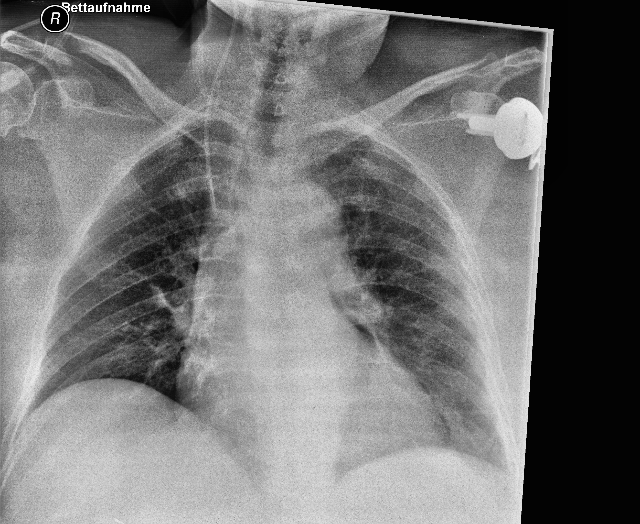

In [7]:
import os
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display as display

# Ruta del archivo Excel
excel_path = 'covid/COVID-19_Radiography_Dataset/COVID.metadata.xlsx'

# Leer el archivo Excel
df = pd.read_excel(excel_path)

# Función para agregar una foto a la carpeta y actualizar el Excel
def agregar_foto(file_name, format, size, url):
    global df  # Declarar df como una variable global

    # Verificar si la foto ya existe
    if os.path.isfile(f'covid/{file_name}.{format}'):
        print(f"La foto '{file_name}.{format}' ya existe.")
        return

    try:
        # Descargar la imagen desde la URL
        response = requests.get(url)
        response.raise_for_status()  # Verificar si la solicitud fue exitosa

        # Abrir la imagen con PIL
        image = Image.open(BytesIO(response.content))

        # Guardar la imagen en la carpeta
        image.save(f'covid/{file_name}.{format}')

        # Agregar una nueva fila al DataFrame
        new_row = {'FILE NAME': file_name, 'FORMAT': format, 'SIZE': size, 'URL': url}
        df = df.append(new_row, ignore_index=True)

        # Guardar el DataFrame actualizado en el Excel
        df.to_excel(excel_path, index=False)
        print(f"Se agregó la foto '{file_name}.{format}' al Excel.")
    except Exception as e:
        print(f"No se pudo agregar la foto '{file_name}.{format}': {str(e)}")

# Función para modificar una foto existente en la carpeta y actualizar el Excel
def modificar_foto(file_name, format, size, url):
    # Verificar si la foto existe
    if not os.path.isfile(f'covid/{file_name}.{format}'):
        print(f"La foto '{file_name}.{format}' no existe.")
        return

    # Modificar la foto
    # Por ahora, simplemente actualiza el tamaño en el Excel
    df.loc[df['FILE NAME'] == file_name, 'SIZE'] = size

    # Guardar el DataFrame actualizado en el Excel
    df.to_excel(excel_path, index=False)
    print(f"Se modificó la foto '{file_name}.{format}' en el Excel.")

# Función para eliminar una foto de la carpeta y actualizar el Excel
def eliminar_foto(file_name, format):
    # Verificar si la foto existe
    if not os.path.isfile(f'covid/{file_name}.{format}'):
        print(f"La foto '{file_name}.{format}' no existe.")
        return

    # Eliminar la foto
    os.remove(f'covid/{file_name}.{format}')

    # Eliminar la fila correspondiente del DataFrame
    df.drop(df[df['FILE NAME'] == file_name].index, inplace=True)

    # Guardar el DataFrame actualizado en el Excel
    df.to_excel(excel_path, index=False)
    print(f"Se eliminó la foto '{file_name}.{format}' del Excel.")

def mostrar_imagen_por_file_name(file_name):
    # Buscar la fila correspondiente al "FILE NAME"
    row = df[df['FILE NAME'] == file_name]

    if row.empty:
        print(f"No se encontró el archivo con FILE NAME: {file_name}")
        return

    # Obtener el formato y cargar la imagen
    format = row.iloc[0]['FORMAT']
    image_path = f'covid/{file_name}.{format}'

    # Mostrar la imagen
    if os.path.isfile(image_path):
        display.display(Image.open(image_path))
    else:
        print(f"No se encontró la imagen correspondiente a FILE NAME: {file_name}")



# Agregar una foto
#agregar_foto('covid-test-video', 'png', '640x524', 'https://raw.githubusercontent.com/ml-workgroup/covid-19-image-repository/master/png/4c0fcf57.png')

# Modificar una foto
#modificar_foto('covid-test-video', 'png', '640x524', 'https://raw.githubusercontent.com/ml-workgroup/covid-19-image-repository/master/png/4c0fcf57.png')

# Eliminar una foto
#eliminar_foto('covid-test-video', 'png')

# Reemplazar con el FILE NAME que deseas buscar y mostrar
#mostrar_imagen_por_file_name('covid-test-video')

file_name_widget = widgets.Text(description="File Name:")
format_widget = widgets.Text(description="Format:")
size_widget = widgets.Text(description="Size:")
url_widget = widgets.Text(description="URL:")
add_button = widgets.Button(description="Agregar Foto")
modify_button = widgets.Button(description="Modificar Foto")
delete_button = widgets.Button(description="Eliminar Foto")
show_button = widgets.Button(description="Mostrar Foto")

def on_add_button_clicked(b):
    agregar_foto(file_name_widget.value, format_widget.value, size_widget.value, url_widget.value)

def on_modify_button_clicked(b):
    modificar_foto(file_name_widget.value, format_widget.value, size_widget.value, url_widget.value)

def on_delete_button_clicked(b):
    eliminar_foto(file_name_widget.value, format_widget.value)

def on_show_button_clicked(b):
    mostrar_imagen_por_file_name(file_name_widget.value)

add_button.on_click(on_add_button_clicked)
modify_button.on_click(on_modify_button_clicked)
delete_button.on_click(on_delete_button_clicked)
show_button.on_click(on_show_button_clicked)

# Mostrar widgets
display.display(file_name_widget)
display.display(format_widget)
display.display(size_widget)
display.display(url_widget)
display.display(add_button)
display.display(modify_button)
display.display(delete_button)
display.display(show_button)